In [35]:
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2

## GoogLeNet Classification

In [36]:
def googlenet_classification(image_path, net, mean_val, class_names, 
                             swap_channels=False):
    image = cv2.imread(image_path)
    image_copy = np.copy(image)
    
    if isinstance(mean_val, np.ndarray):
        tensor = cv2.dnn.blobFromImage(image_copy, 1.0, 
                                       (224, 224), 1.0, False)
        tensor -= mean_val
    else:
        tensor = cv2.dnn.blobFromImage(image_copy , 1.0, (224, 224),
                                       mean_val, swap_channels)
        
    net.setInput(tensor)
    start = time.time()
    prob = net.forward()
    prob = prob.flatten()
    end = time.time()
    
    # show timing information on AlexNet
    print("Forward Time: GoogLeNet took {:.6f} seconds.".format(end - start))
    
    r = 1
    for i in np.argsort(prob)[-5:]:
        txt = "Label: {}, {:.2f}%".format(class_names[i], prob[i] * 100)
        cv2.putText(image, txt, (10, image.shape[0] - r*30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2);
        r += 1
    
    # show the image after classifying
    plt.figure(figsize=(15, 12))
    plt.imshow(image[:, :, [2, 1, 0]])
    plt.axis('off')
    plt.grid(False)
    plt.show()

In [37]:
model_path = "./model/model.onnx"
googlenet = cv2.dnn.readNetFromONNX(model_path)

In [38]:
class_names_path = "./model/synset_words.txt"

with open(class_names_path) as f:
    class_names = [' '.join(l.split(' ')[1: ]).rstrip() for l in f.readlines()]

Forward Time: GoogLeNet took 0.711002 seconds.


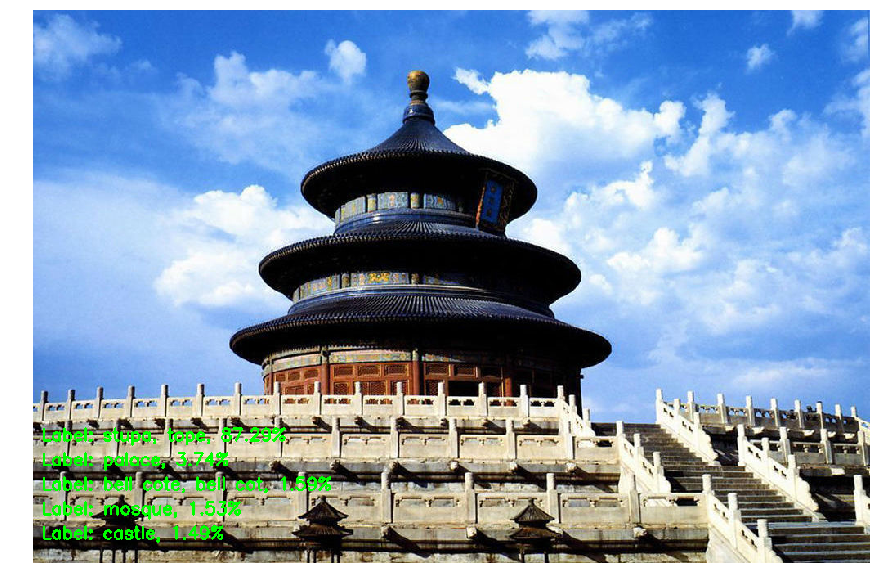

In [39]:
image_path = "../../../datasets/temple.jpg"
googlenet_classification(image_path, googlenet, (104, 117, 123), class_names)

Forward Time: GoogLeNet took 0.677810 seconds.


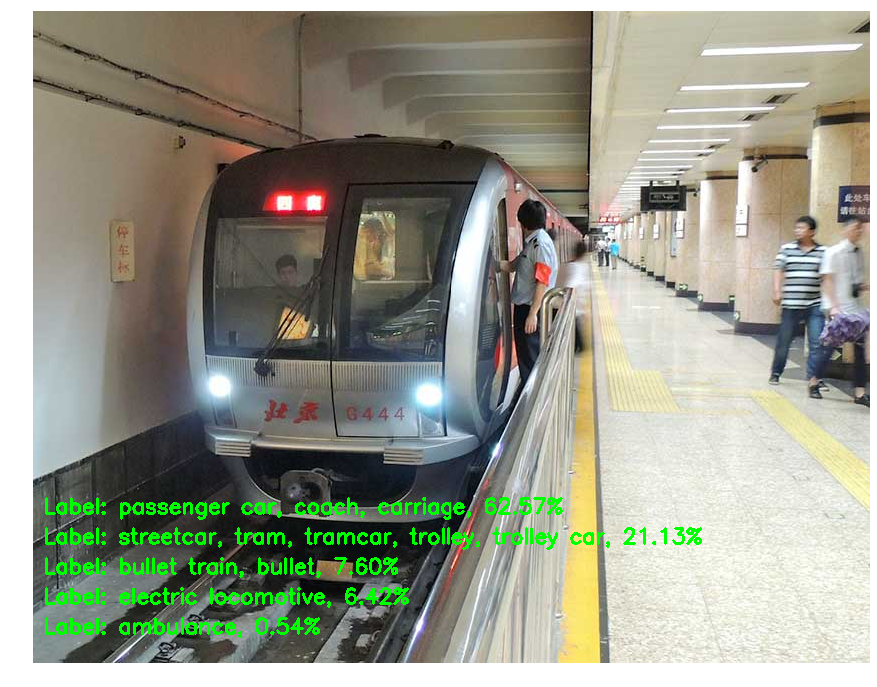

In [40]:
image_path = "../../../datasets/subway.jpg"
googlenet_classification(image_path, googlenet, (104, 117, 123), class_names)

Forward Time: GoogLeNet took 0.893038 seconds.


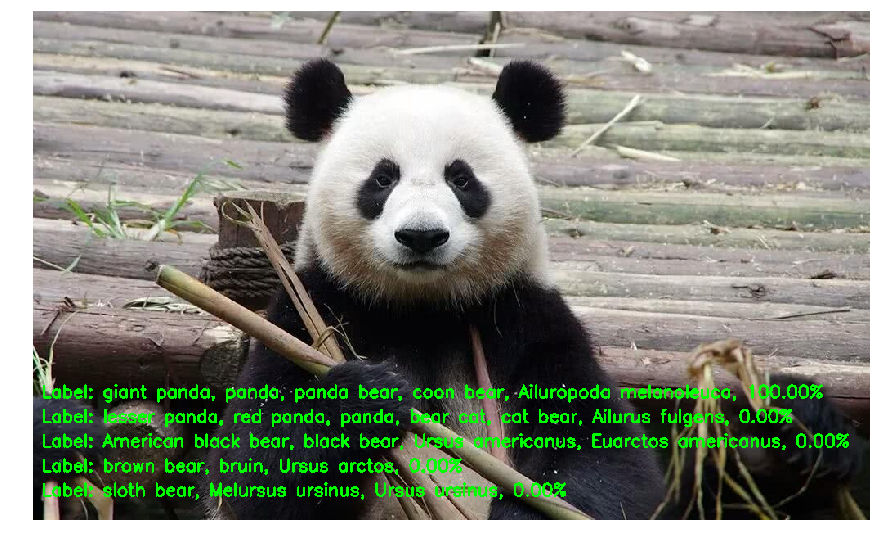

In [41]:
image_path = "../../../datasets/pandas.jpg"

googlenet_classification(image_path, googlenet, (104, 117, 123), class_names)